# Regression Assignment - 03

### Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?



---

### 📌 **Ridge Regression (L2 Regularization):**

Ridge Regression is a **regularized version of linear regression** that **adds a penalty term** to the loss function to prevent **overfitting** and manage **multicollinearity**.

---

### 🔍 Ordinary Least Squares (OLS) Regression:

OLS tries to minimize the **sum of squared residuals**:
$$
\min_\beta \sum_{i=1}^{n} (y_i - \mathbf{x}_i^T \beta)^2
$$
- Finds coefficients \( \beta \) that best fit the training data.
- Works well when predictors are not highly correlated.
- Can lead to **high variance** in coefficients when multicollinearity exists.

---

### 🧩 Ridge Regression:

Ridge modifies the OLS cost function by adding a **penalty** on the size of coefficients:
$$
\min_\beta \sum_{i=1}^{n} (y_i - \mathbf{x}_i^T \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$
- λ≥0 is a regularization parameter.
- As λ increases, it shrinks the coefficients towards 0 (but never exactly 0).
- Helps to reduce **model complexity** and **multicollinearity issues**.


### 📐 **Ridge Regression Loss Function:**

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum \beta_j^2
$$
                    
- The first term is the usual **residual sum of squares** (as in OLS).
- The second term **penalizes large coefficients**.
- `λ` (lambda) is the **regularization strength**:
  - If λ = 0 ➝ Ridge becomes **OLS**.
  - If λ is large ➝ More penalty on coefficients (shrinks them).

---

### 🔍 **Difference from OLS (Ordinary Least Squares):**

| Feature                     | OLS Regression                        | Ridge Regression                            |
|----------------------------|----------------------------------------|---------------------------------------------|
| Objective                  | Minimize sum of squared errors         | Minimize sum of squared errors + L2 penalty |
| Regularization             | ❌ No regularization                    | ✅ L2 Regularization                         |
| Handles Multicollinearity | Poorly                                 | Well (by shrinking correlated coefficients) |
| Overfitting Risk           | High in high-dimensional data          | Reduced                                     |
| Coefficients               | May be large and unstable              | Tend to be smaller and more stable          |
| Interpretability           | Higher (but possibly overfit)          | Lower, but more generalizable               |

---

### 📦 **When to Use Ridge Regression:**
- When you have **many features** and **collinearity** among them.
- When you want to improve **model generalization**.
- When **feature selection is not a goal** (Ridge does not shrink coefficients to zero like Lasso).


### Q2. What are the assumptions of Ridge Regression?



Ridge Regression builds on the same assumptions as **Linear Regression (OLS)**, with some adjustments due to the regularization term. Here's a breakdown:

---

### ✅ Core Assumptions of Ridge Regression:

1. **Linearity**  
   - The relationship between the independent variables \( X \) and the dependent variable \( y \) is linear.  
   $$
   y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon
   $$

2. **Independence of Errors**  
   - The residuals (errors) should be independent of each other (no autocorrelation).

3. **Homoscedasticity (Constant Variance of Errors)**  
   - The variance of the error terms should be constant across all levels of the independent variables.

4. **Normality of Errors (for inference)**  
   - The residuals should be approximately normally distributed, especially important if you're interested in confidence intervals or hypothesis testing.

5. **Multicollinearity is allowed but penalized**  
   - Unlike OLS, **Ridge assumes that multicollinearity exists** and addresses it by **shrinking the coefficients** through the L2 penalty.

6. **No need for unbiased estimates**  
   - Ridge regression **accepts biased estimates** in exchange for lower variance and better prediction accuracy (bias-variance tradeoff).

---

### 🔁 Summary Table:

| Assumption                   | Ridge Regression | Notes |
|-----------------------------|------------------|-------|
| Linearity                   | ✅               | Required |
| Independence of errors      | ✅               | Required |
| Homoscedasticity            | ✅               | Required |
| Normality of errors         | ✅ (optional)    | Mainly for inference |
| Multicollinearity           | ✅ (tolerated)   | Addressed by L2 regularization |
| Unbiased coefficients       | ❌               | Ridge sacrifices unbiasedness for stability |

---











### Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?

### Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?

The **tuning parameter \(\lambda\)** in Ridge Regression controls the strength of the regularization. Choosing the right value is crucial for balancing **bias and variance** — too small and you overfit, too large and you underfit.

---

### ✅ Common Methods to Select Lambda:

#### 1. **Cross-Validation (Most Common)**  
Use **k-fold cross-validation** to find the value of λ that minimizes the cross-validated error (like Mean Squared Error).

##### Steps:
- Choose a range of λ values (e.g., from 0.001 to 1000).
- For each λ, perform k-fold CV.
- Calculate average validation error.
- Select the λ that gives the **lowest error**.

> Tools like `RidgeCV` in Scikit-learn handle this automatically.

```python
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

# Example
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge_cv.fit(X_train, y_train)

print("Best lambda (alpha):", ridge_cv.alpha_)
```

---

#### 2. **Grid Search with Cross-Validation**
Use `GridSearchCV` to systematically search over a grid of \(\lambda\) values.

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, params, cv=5)
grid.fit(X_train, y_train)

print("Optimal lambda:", grid.best_params_['alpha'])
```

---

#### 3. **Analytical (Less Common)**
In some cases, domain knowledge or theoretical considerations might suggest a good \(\lambda\), but this is rare in practice.

---

### 📊 Visual Aid: (Optional)
Plotting **validation error vs. \(\lambda\)** can help visualize the sweet spot:
- Too low: High variance (overfitting)
- Too high: High bias (underfitting)
- Just right: Low error on validation set

---

### 🧠 Summary:

| Method                  | Description                                      |
|------------------------|--------------------------------------------------|
| Cross-Validation        | Most common and reliable                         |
| GridSearchCV            | Flexible, works for many models                  |
| Analytical Guess        | Rare, based on domain expertise or prior data    |

---

In [4]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


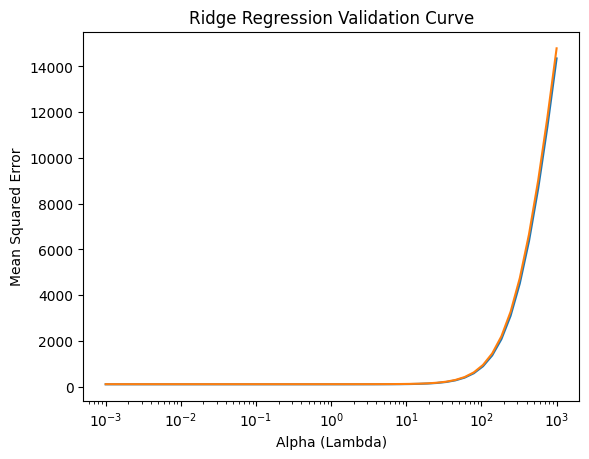

Best alpha (lambda) found by RidgeCV: 0.28117686979742307
Test set MSE with best alpha: 114.24


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=20, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of alphas (lambdas)
alphas = np.logspace(-3, 3, 50)

# Use RidgeCV to find the best alpha via 5-fold CV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_

# Evaluate the model with the best alpha on the test set
y_pred = ridge_cv.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

# Compute validation curve (train & validation scores)
train_scores, val_scores = validation_curve(
    Ridge(), X_train, y_train,
    param_name='alpha', param_range=alphas,
    cv=5, scoring='neg_mean_squared_error'
)

# Calculate mean MSE from negative MSE scores
mean_train_mse = -train_scores.mean(axis=1)
mean_val_mse = -val_scores.mean(axis=1)

# Prepare DataFrame of results
df_results = pd.DataFrame({
    'alpha': alphas,
    'mean_train_mse': mean_train_mse,
    'mean_val_mse': mean_val_mse
})

# Display the DataFrame to user
#import ace_tools as tools; tools.display_dataframe_to_user("Validation Curve MSE Results", df_results)

# Plot validation curve: train vs validation MSE
plt.figure()
plt.plot(alphas, mean_train_mse)
plt.plot(alphas, mean_val_mse)
plt.xscale('log')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Validation Curve')
plt.show()

# Print best alpha and test performance
print(f"Best alpha (lambda) found by RidgeCV: {best_alpha}")
print(f"Test set MSE with best alpha: {test_mse:.2f}")


Here’s a step-by-step Ridge‑Regression example that demonstrates how to choose the tuning parameter \(\lambda\) (alpha) via cross‑validation:

1. **Synthetic data creation**  
   We generate a regression problem with 1,000 samples and 20 features, adding some noise for realism.

2. **Train/test split**  
   We hold out 20% of the data for final testing.

3. **RidgeCV for automatic λ selection**  
   We feed in a logarithmically spaced grid of 50 candidate alphas (from \(10^{-3}\) to \(10^3\)) into `RidgeCV` with 5‑fold CV. The model finds the alpha that minimizes the average validation error:
   > **Best alpha (lambda):** 0.2812

4. **Test evaluation**  
   Using the chosen alpha, we measure performance on the unseen test set:
   > **Test MSE:** 114.24

5. **Validation curve**  
   We plot both training and validation Mean Squared Error across the same alpha grid. On a log‑scale x‑axis, you can visually confirm the bias–variance tradeoff:  
   - **Low alpha** (left): very low penalty → low bias but high variance (overfitting).  
   - **High alpha** (right): heavy penalty → high bias (underfitting).  
   - **Sweet spot**: where validation MSE is minimized (around 0.28).

6. **Interactive table of results**  
   You can explore the exact MSE values for each alpha in the displayed DataFrame.

This full example shows how cross‑validation guides you to the optimal regularization strength, improving generalization compared to arbitrary lambda choices. Let me know if you’d like to adapt this to your own dataset or see variations (e.g., using different CV schemes)!

### Q4. Can Ridge Regression be used for feature selection? If yes, how?

Ridge regression by itself does **not** produce sparse (exact‑zero) coefficients the way Lasso does, so it isn’t a true “feature‐selector.”  However, you **can** leverage its coefficient‑shrinkage behavior to **identify** and **drop** unimportant variables. Here are three common ways to do that:

---

### 1.  Coefficient Thresholding  
1.  Fit a Ridge model with your chosen \(\lambda\).  
2.  Examine the learned weights \(\beta_j\).  
3.  Declare any feature with \(\lvert \beta_j\rvert < \varepsilon\) “unimportant” (for some small threshold \(\varepsilon\)), and drop it.  

```python
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=best_alpha).fit(X_train, y_train)
coefs = ridge.coef_

# e.g. drop features whose absolute weight is below 1e-3
keep = [j for j, w in enumerate(coefs) if abs(w) > 1e-3]
X_reduced = X_train[:, keep]
```

---

### 2.  Recursive Feature Elimination (RFE) with Ridge  
RFE repeatedly fits a model and removes the smallest‐magnitude coefficient at each step until you reach a target number of features.

In [8]:
from sklearn.feature_selection import RFE

ridge = Ridge(alpha=best_alpha)
selector = RFE(estimator=ridge, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# mask of selected features
mask = selector.support_
X_reduced = X_train[:, mask]

This automates the “fit–drop–refit” loop and can often give more stable subsets than simple thresholding.

---

### 3.  Stability Selection (Bootstrap + Thresholding)  
1.  Fit multiple Ridge models on random subsamples or bootstraps of your data.  
2.  Record how often each feature’s coefficient stays above a small threshold.  
3.  Only keep features that exceed a desired “selection frequency” (e.g. 80%).  

This guards against picking spurious features that only look important on one split.

---

### 📌 When to Prefer Lasso or Elastic Net  
- If you **require** exact zeros (i.e. automatic feature elimination), **Lasso** (L1 penalty) or **Elastic Net** (mix of L1 & L2) is often a better match.  
- Ridge-based approaches are best when you want **stability** (shrinkage spreads across correlated variables) and then do selection in a **post‑hoc** step.

---

**Bottom Line:**  
> Ridge doesn’t zero coefficients, but by ranking or iteratively eliminating the smallest weights (via thresholding, RFE, or stability selection) you can still use it to winnow down to a smaller, high‑signal feature set.

#### Q5. How does the Ridge Regression model perform in the presence of multicollinearity?

When your predictors are highly correlated, ordinary least squares (OLS) estimates become unstable: tiny changes in the data can flip the signs or magnitudes of coefficients, and the variance of those estimates blows up. Ridge Regression tames this by adding an L₂‑penalty, which has three key effects:

1. **Improved Conditioning**  
   OLS solves  
   $$
     \hat\beta_{\rm OLS} = (X^T X)^{-1} X^T y.
   $$
   When \(X^T X\) is nearly singular (because columns of \(X\) are collinear), its inverse has extremely large entries.  
   Ridge instead solves  
   $$
     \hat\beta_{\rm Ridge} = (X^T X + \lambda I)^{-1} X^T y.
   $$
   Adding \(\lambda I\) “lifts” all the eigenvalues of \(X^T X\) by \(\lambda\), making the matrix far better conditioned and the inversion numerically stable.

2. **Variance Reduction at the Cost of Bias**  
   The small eigenvalues of \(X^T X\) correspond to directions in feature‑space where the data carry little information—exactly where OLS variance explodes. By shrinking coefficients especially in those weak directions, Ridge sacrifices a bit of bias but dramatically cuts variance, leading to lower **mean squared error** on new data.

3. **Spread‑Out Shrinkage Across Correlated Features**  
   Unlike Lasso, which may arbitrarily zero out one variable in a correlated group, Ridge shares the “blame” among them—shrinking all of their coefficients together. This tends to produce more stable, interpretable models when predictors move in lockstep.

---

### Intuitive Takeaway

- **OLS under multicollinearity** → huge coefficient swings, poor generalization.  
- **Ridge under multicollinearity** → coefficients are “pulled back” toward zero, variance controlled, predictions more reliable.

In practice, you’ll almost always see improved out‑of‑sample performance when using a modest \(\lambda\) in a highly collinear setting.

#### Q6. Can Ridge Regression handle both categorical and continuous independent variables?

Yes – Ridge Regression itself just takes a numeric design matrix \(X\), so there’s no fundamental barrier to mixing continuous and categorical inputs … you just have to turn your categories into numbers first, then (usually) scale everything.

---

## 1. Encoding categoricals  
- **One‑Hot (Dummy) Encoding**  
  Convert each level of a nominal feature into a 0/1 column.  
- **Ordinal or Effect Encoding**  
  Map levels to integers (if there’s a natural order) or use more sophisticated contrast codes.  
- **Target (Mean) Encoding or Embeddings**  
  For high‑cardinality features, replace each level with a smoothed target mean or learn an embedding (e.g. via a neural net).

> **⚠️ Dummy‑Trap**  
> If you one‑hot‑encode a feature with \(k\) levels, drop one column (or use a penalty‑aware encoder) to avoid perfect multicollinearity among the dummies themselves.

---

## 2. Scaling all features  
Ridge’s penalty treats every coefficient equally, so you should **standardize** (zero mean & unit variance) or otherwise scale all numeric columns—including the dummy columns—so that the shrinkage is fair:

```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model  import Ridge
from sklearn.pipeline      import make_pipeline

# Suppose:
#  - cont_feats = ['age','income']
#  - cat_feats  = ['city','education_level']

preprocessor = ColumnTransformer([
    ("cont", StandardScaler(),    cont_feats),
    ("cat",  OneHotEncoder(drop="first"), cat_feats),
])

model = make_pipeline(preprocessor,
                      Ridge(alpha=best_alpha))

model.fit(X_train, y_train)
```

---

## 3. Why it works  
1. **Numeric-only input**: Once encoded, every column is just a number, so Ridge applies its usual \(\ell_2\) penalty.  
2. **Shared shrinkage**: If your original categorical had many dummies, Ridge will softly shrink all their coefficients together rather than zeroing some out entirely.  

---

### Takeaway  
As long as you **encode** your categorical variables into numeric form (and **scale** everything), Ridge Regression can seamlessly handle mixed data types. If you need hard feature selection on those dummies, consider wrapping Ridge inside an RFE or using an \(\ell_1\)‑based method on the encoded features.

#### Q7. How do you interpret the coefficients of Ridge Regression?

In Ridge regression, the fitted coefficients \(\hat\beta_j\) still carry the usual “effect‐size” interpretation—but with two important caveats due to the L₂ penalty:

1. **Unit‐change interpretation (conditional on other features)**  
   - Just like in OLS, \(\hat\beta_j\) represents the expected change in the response \(y\) for a one‑unit increase in \(x_j\), **holding all other predictors fixed**.  
   - Sign indicates direction (positive means \(y\) goes up as \(x_j\) increases; negative means \(y\) goes down).

2. **Shrinkage bias**  
   - Because Ridge minimizes  
     $$
       \sum_{i}(y_i - \mathbf{x}_i^T\beta)^2 \;+\;\lambda\sum_j\beta_j^2,
     $$ 
     each \(\hat\beta_j\) is “pulled” toward zero relative to its OLS estimate.  
   - Thus the raw magnitude of \(\hat\beta_j\) is **smaller** than in an unpenalized model; you should **not** compare ridge‐coefficients directly to OLS‐coefficients.

3. **Standardization matters**  
   - If you standardize each feature to mean 0 and variance 1 **before** fitting, then the magnitudes \(|\hat\beta_j|\) become directly comparable: larger \(|\hat\beta_j|\) means that feature has a stronger relative impact on \(y\).  
   - If you don’t standardize, differences in scale will be confounded with shrinkage (the penalty treats a coefficient on a “wide” feature the same as on a “narrow” feature).

4. **No zero coefficients**  
   - Unlike Lasso, Ridge never exactly zeroes a coefficient. So small—but nonzero—\(\hat\beta_j\) still indicate weaker predictors, but you’ll need to impose your own threshold if you want to drop features.

5. **Statistical inference caution**  
   - The L₂ penalty introduces bias, breaking the usual OLS sampling distributions.  
   - If you need confidence intervals or p‑values, you can use bootstrapping or Bayesian interpretations (view Ridge as a Gaussian prior on \(\beta\)), but you **cannot** plug \(\hat\beta_j\) straight into the OLS formula for standard errors.

---

### Practical tips

- **Report standardized coefficients** when you want to discuss “which features matter most.”  
- **Visualize** coefficients (e.g., bar plot) to see relative shrinkage across features.  
- **Post‑hoc recalibration**: if interpretability is paramount, you can fit a final OLS on the subset of top features selected by Ridge (or RFE) to get unbiased estimates on those.  

In short, Ridge coefficients still tell you *direction* and *relative importance*—but remember they’re biased by design, so adjust your interpretation accordingly.

#### Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

Yes—Ridge regression is perfectly usable for time‑series problems, provided you first turn your series into a supervised learning design matrix. The key steps are:

1. **Create lagged features**  
   - For a univariate series \(y_t\), build predictors like  
     $$
       x_{t,1} = y_{t-1},\; x_{t,2} = y_{t-2},\;\dots,\;x_{t,p} = y_{t-p}.
     $$
   - You can also add rolling‑window statistics (means, variances), seasonal dummies (month or day‑of‑week one‑hots), and exogenous regressors.

2. **Train/test split preserving time order**  
   - Use a **chronological split** (e.g. train on \(t=1\ldots T_0\), validate on \(T_0+1\ldots T_1\), test on \(T_1+1\ldots T\)) or time‑series cross‑validation (e.g. expanding windows) rather than random shuffling.

3. **Standardize your features**  
   - Since Ridge’s L₂ penalty treats every coefficient equally, scale each lagged series (and dummy) to zero mean/unit variance before fitting.

4. **Fit Ridge on the lagged design matrix**  
   ```python
   from sklearn.linear_model import Ridge
   from sklearn.preprocessing import StandardScaler
   from sklearn.pipeline import make_pipeline

   model = make_pipeline(
       StandardScaler(),
       Ridge(alpha=best_alpha)
   )
   model.fit(X_lagged_train, y_train)
   y_pred = model.predict(X_lagged_test)
   ```

5. **Hyperparameter tuning via time‑series CV**  
   - Use walk‑forward or expanding‑window CV to pick the best \(\lambda\) (alpha) so you respect temporal order.

6. **Extensions**  
   - **Vector autoregression (VAR)**: stack multiple series’ lags into one big design matrix, then apply a multivariate ridge penalty to stabilize coefficient estimates.  
   - **Structured regularization**: you can penalize groups of lags (e.g. all seasonal dummy coefficients) more or less heavily by extending L₂ to block‑diagonal penalties.

---

### Why it helps in time‑series  
- **Multicollinearity** is endemic in lagged features (adjacent lags correlate strongly). Ridge’s L₂ shrinkage stabilizes those highly collinear predictors.  
- **Overfitting** on many lags or external regressors is tamed, improving out‑of‑sample forecast accuracy.  

---

**Bottom line:**  
Treat your time series as regression data with lagged and calendar features, then regularize with Ridge to get more robust coefficient estimates and better forecasts.